In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors,cm,colorbar
import scipy
import shapefile
import re
import json

/Users/grisha.oryol/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [13]:
from IPython.display import HTML

In [503]:
data2007=pd.read_csv("hate_crimes_by_incident_2007.csv",sep=';')
data2008=pd.read_csv("hate_crimes_by_incident_2008.csv",sep=';')
data2009=pd.read_csv("hate_crimes_by_incident_2009.csv",sep=';')
data2010=pd.read_csv("hate_crimes_by_incident_2010.csv",sep=';')
data2011=pd.read_csv("hate_crimes_by_incident_2011.csv",sep=';')
data2012=pd.read_csv("hate_crimes_by_incident_2012.csv")
data2013=pd.read_csv("hate_crimes_by_incident_2013.csv",sep=';')
data2014=pd.read_csv("hate_crimes_by_incident_2014.csv",sep=';')

In [511]:
data2012['BIASMO1_num']=data2012.BIASMO1.apply(lambda x:int(re.sub("\(|\)|[a-zA-z, \/]|\-","",x)))

In [534]:
data.LOCCOD2.value_counts()

                                      44709
20                                      594
13                                      320
18                                      120
22                                       92
(20) Residence/home                      88
4                                        68
21                                       52
(13) Highway/road/alley                  48
25                                       47
3                                        45
10                                       25
7                                        23
5                                        20
15                                       19
11                                       16
12                                       16
23                                       13
(18) Parking lot/garage                  12
1                                        12
53                                       12
8                                        11
14                              

In [519]:
bias_dict={}
for i,row in data2012.iterrows():
    bias_dict[row['BIASMO1_num']]=re.sub("[\(\)0-9]","",row.BIASMO1)

In [520]:
population={11:196817552,12:37685848,32:50477594,21:5.3*1000000,41:318.9*1000000*0.02}
bias_dict

{11: ' Anti-White',
 12: ' Anti-Black or African American',
 13: ' Anti-American Indian or Alaska Native',
 14: ' Anti-Asian',
 15: ' Anti-Multi-Racial',
 21: ' Anti-Jewish',
 22: ' Anti-Catholic',
 23: ' Anti-Protestant',
 24: ' Anti-Islamic',
 25: ' Anti-Other Religion',
 26: ' Anti-Multi-Religious',
 27: ' Anti-Atheism/Agnosticism',
 32: ' Anti-Hispanic or Latino',
 33: ' Anti-Not Hispanic or Latino',
 41: ' Anti-Male Homosexual',
 42: ' Anti-Female Homosexual',
 43: ' Anti-Lesbian, Gay, Bisexual, or Transgender, Mixed Group LGBT',
 44: ' Anti-Heterosexual',
 45: ' Anti-Bisexual',
 51: ' Anti-Physical Disability',
 52: ' Anti-Mental Disability',
 62: ' Anti-Female',
 72: ' Anti-Gender Non-Conforming'}

In [521]:
data2012.BIASMO1=data2012.BIASMO1_num

In [364]:
data1=pd.concat([data2007,data2008,data2009,data2010,data2011,data2012,data2013,data2014])

In [123]:
HTML(data2014[:5].to_html())

,REC_IR,STATNUM,ORI,ORIADDDT,ORINIBRS,CITY,STATECOD,POPGRP,DIVISN,REGION,AGINDIC,CORECTY,COVBYORI,FIELDNO,JUDDIST,NBRSFLG,INACTDTE,POP1,COUNTY1,MSA1,LSTPOP1,POP2,COUNTY2,MSA2,LSTPOP2,POP3,COUNTY3,MSA3,LSTPOP3,POP4,COUNTY4,MSA4,LSTPOP4,POP5,COUNTY5,MSA5,LSTPOP5,MASTERYR,QTR1ACT,QTR2ACT,QTR3ACT,QTR4ACT,F1QACT,F2QACT,F3QACT,F4QACT,AGNAME,CFIPS1,CFIPS2,CFIPS3,CFIPS4,CFIPS5,IINCIDNO,INCIDDTE,DATASRC,QUARTER,TNUMVTMS,TNUMOFF,GOFFRAC,OFFCOD1,NUMVTM1,LOCCOD1,BIASMO1,OFFCOD2,NUMVTM2,LOCCOD2,BIASMO2,OFFCOD3,NUMVTM3,LOCCOD3,BIASMO3,OFFCOD4,NUMVTM4,LOCCOD4,BIASMO4,OFFCOD5,NUMVTM5,LOCCOD5,BIASMO5,OFFCOD6,NUMVTM6,LOCCOD6,BIASMO6,OFFCOD7,NUMVTM7,LOCCOD7,BIASMO7,OFFCOD8,NUMVTM8,LOCCOD8,BIASMO8,OFFCOD9,NUMVTM9,LOCCOD9,BIASMO9,OFFCOD10,NUMVTM10,LOCCOD10,BIASMO10,VTYP_I1,VTYP_B1,VTYP_F1,VTYP_G1,VTYP_R1,VTYP_S1,VTYP_O1,VTYP_U1,VTYP_I2,VTYP_B2,VTYP_F2,VTYP_G2,VTYP_R2,VTYP_S2,VTYP_O2,VTYP_U2,VTYP_I3,VTYP_B3,VTYP_F3,VTYP_G3,VTYP_R3,VTYP_S3,VTYP_O3,VTYP_U3,VTYP_I4,VTYP_B4,VTYP_F4,VTYP_G4,VTYP_R4,VTYP_S4,VTYP_O4,VTYP_U4,VTYP_I5,VTYP_B5,VTYP_F5,VTYP_G5,VTYP_R5,VTYP_S5,VTYP_O5,VTYP_U5,VTYP_I6,VTYP_B6,VTYP_F6,VTYP_G6,VTYP_R6,VTYP_S6,VTYP_O6,VTYP_U6,VTYP_I7,VTYP_B7,VTYP_F7,VTYP_G7,VTYP_R7,VTYP_S7,VTYP_O7,VTYP_U7,VTYP_I8,VTYP_B8,VTYP_F8,VTYP_G8,VTYP_R8,VTYP_S8,VTYP_O8,VTYP_U8,VTYP_I9,VTYP_B9,VTYP_F9,VTYP_G9,VTYP_R9,VTYP_S9,VTYP_O9,VTYP_U9,VTYP_I10,VTYP_B10,VTYP_F10,VTYP_G10,VTYP_R10,VTYP_S10,VTYP_O10,VTYP_U10
0,IR,50,AK0010100,19910430,,ANCHORAGE,AK,1C,9,4,1,Y,,3030,020A,,,301306,,38,299455,0,,,0,0,,,0,0,,,0,0,,,0,2014,Z,Z,I,I,,,,,ANCHORAGE,,,,,,9Y-OKS68F39G,20141206,F,4,2,0,U,290,2,20,41,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,IR,50,AK0010100,19910430,,ANCHORAGE,AK,1C,9,4,1,Y,,3030,020A,,,301306,,38,299455,0,,,0,0,,,0,0,,,0,0,,,0,2014,Z,Z,I,I,,,,,ANCHORAGE,,,,,,5-MQ5Q192 I,20140718,F,3,1,2,W,13A,1,18,13,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,IR,50,AK0010100,19910430,,ANCHORAGE,AK,1C,9,4,1,Y,,3030,020A,,,301306,,38,299455,0,,,0,0,,,0,0,,,0,0,,,0,2014,Z,Z,I,I,,,,,ANCHORAGE,,,,,,F -NJ 7CKF3,20140709,F,3,1,1,W,13B,1,54,12,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,IR,50,AK0010100,19910430,,ANCHORAGE,AK,1C,9,4,1,Y,,3030,020A,,,301306,,38,299455,0,,,0,0,,,0,0,,,0,0,,,0,2014,Z,Z,I,I,,,,,ANCHORAGE,,,,,,5-MQ7F1T2 I,20140926,F,3,2,2,B,120,2,18,13,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,IR,50,AK0010100,19910430,,ANCHORAGE,AK,1C,9,4,1,Y,,3030,020A,,,301306,,38,299455,0,,,0,0,,,0,0,,,0,0,,,0,2014,Z,Z,I,I,,,,,ANCHORAGE,,,,,,F -NJRK7KBF3,20140930,F,3,1,2,W,13B,1,18,13,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [365]:
data1['date']=pd.to_datetime(data1.INCIDDTE,format="%Y%m%d")

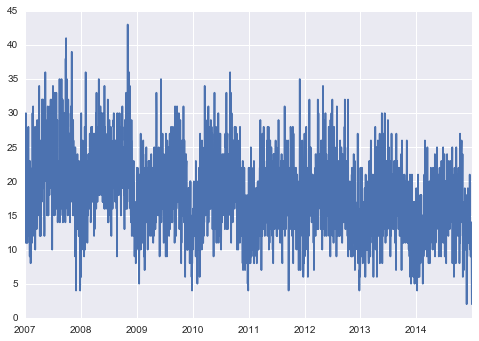

In [366]:
by_date=data1.date.value_counts().sort_index()
by_date.plot()
plt.show()

In [ ]:
# Nov 6, 2012 Obama vs Romney

In [367]:
data1['month']=data1.date.apply(lambda x:x.month)
data1['dayofweek']=data1.date.apply(lambda x:x.dayofweek)
data1['daymonth']=data1.date.apply(lambda x: (x.month,x.day))

In [368]:
by_daymonth=data1.groupby('daymonth')['daymonth'].count()

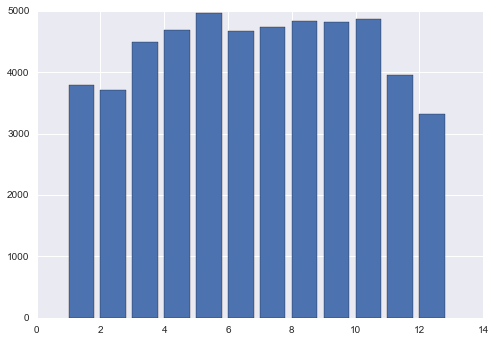

In [369]:
by_month=pd.DataFrame({"avg_month":data1.groupby('month')['month'].count()})
by_month['month']=by_month.index
plt.bar(by_month.index,by_month['avg_month'])
plt.show()

In [370]:
by_month

,avg_month,month
month,,
1,3785,1
2,3706,2
3,4486,3
4,4693,4
5,4962,5
6,4673,6
7,4745,7
8,4839,8
9,4817,9


In [377]:
data[data.avg_month==4486]

,AGINDIC,AGNAME,BIASMO1,BIASMO10,BIASMO2,BIASMO3,BIASMO4,BIASMO5,BIASMO6,BIASMO7,...,VTYP_U5,VTYP_U6,VTYP_U7,VTYP_U8,VTYP_U9,date,month,dayofweek,daymonth,avg_month
0,1,ANCHORAGE,52,,,,,,,,...,0,0,0,0,0,2007-03-07,3,2,"(3, 7)",4486
1,1,ANCHORAGE,12,,,,,,,,...,0,0,0,0,0,2007-03-16,3,4,"(3, 16)",4486
2,1,ANCHORAGE,41,,,,,,,,...,0,0,0,0,0,2007-03-20,3,1,"(3, 20)",4486
3,1,GREEN FOREST,12,,,,,,,,...,0,0,0,0,0,2007-03-20,3,1,"(3, 20)",4486
4,1,MORRILTON,14,,,,,,,,...,0,0,0,0,0,2007-03-31,3,5,"(3, 31)",4486
5,2,PULASKI,21,,,,,,,,...,0,0,0,0,0,2007-03-19,3,0,"(3, 19)",4486
6,1,CHEROKEE VILLAGE,41,,,,,,,,...,0,0,0,0,0,2007-03-14,3,2,"(3, 14)",4486
7,3,NORTHERN ARIZONA UNIV,41,,,,,,,,...,0,0,0,0,0,2007-03-04,3,6,"(3, 4)",4486
8,1,CHANDLER,41,,,,,,,,...,0,0,0,0,0,2007-03-12,3,0,"(3, 12)",4486
9,1,MESA,32,,,,,,,,...,0,0,0,0,0,2007-03-30,3,4,"(3, 30)",4486


In [372]:
data=pd.merge(data1,by_month,on='month',how='inner')

In [374]:
data[:200]

,AGINDIC,AGNAME,BIASMO1,BIASMO10,BIASMO2,BIASMO3,BIASMO4,BIASMO5,BIASMO6,BIASMO7,...,VTYP_U5,VTYP_U6,VTYP_U7,VTYP_U8,VTYP_U9,date,month,dayofweek,daymonth,avg_month
0,1,ANCHORAGE,52,,,,,,,,...,0,0,0,0,0,2007-03-07,3,2,"(3, 7)",4486
1,1,ANCHORAGE,12,,,,,,,,...,0,0,0,0,0,2007-03-16,3,4,"(3, 16)",4486
2,1,ANCHORAGE,41,,,,,,,,...,0,0,0,0,0,2007-03-20,3,1,"(3, 20)",4486
3,1,GREEN FOREST,12,,,,,,,,...,0,0,0,0,0,2007-03-20,3,1,"(3, 20)",4486
4,1,MORRILTON,14,,,,,,,,...,0,0,0,0,0,2007-03-31,3,5,"(3, 31)",4486
5,2,PULASKI,21,,,,,,,,...,0,0,0,0,0,2007-03-19,3,0,"(3, 19)",4486
6,1,CHEROKEE VILLAGE,41,,,,,,,,...,0,0,0,0,0,2007-03-14,3,2,"(3, 14)",4486
7,3,NORTHERN ARIZONA UNIV,41,,,,,,,,...,0,0,0,0,0,2007-03-04,3,6,"(3, 4)",4486
8,1,CHANDLER,41,,,,,,,,...,0,0,0,0,0,2007-03-12,3,0,"(3, 12)",4486
9,1,MESA,32,,,,,,,,...,0,0,0,0,0,2007-03-30,3,4,"(3, 30)",4486


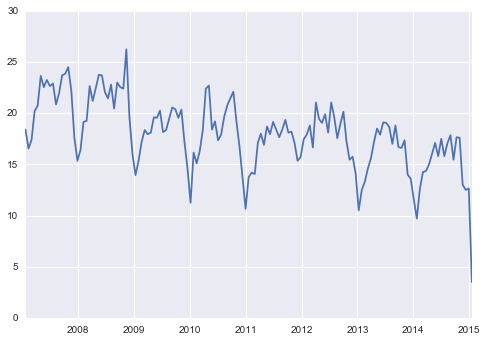

In [379]:
by_date.resample('20D',label='right').mean().plot()
plt.show()

In [302]:
merged.groupby('month').sum()

,avg,avg_month,norm
month,,,
1,3785,938680,1.0
2,3706,837556,1.0
3,4486,1112528,1.0
4,4693,1126320,1.0
5,4962,1230576,1.0
6,4673,1121520,1.0
7,4745,1176760,1.0
8,4839,1200072,1.0
9,4817,1156080,1.0


In [380]:
anti_w=data[data.BIASMO1==11]
anti_b=data[data.BIASMO1==12]

In [464]:
most_pop=data.BIASMO1.value_counts()[:5]
most_pop

12    17653
21     6676
41     5817
11     5016
32     3643
Name: BIASMO1, dtype: int64

In [448]:
def merge(df,by_month):
    global df_by_date
    df_by_date=df.date.value_counts().sort_index()
    #print(by_month.loc[df_by_date.index.month])
    df_by_date=pd.DataFrame({"month":df_by_date.index.month,"avg":df_by_date.values,
                             'avg_month':by_month['avg_month'].loc[df_by_date.index.month].values},index=df_by_date.index)
    #df_merged=pd.merge(df_by_date,by_month,on='month',how='outer')
    #df_merged.index=df_by_date.index
    df_by_date['norm']=df_by_date.avg/df_by_date.avg_month
    return df_by_date

In [449]:
merged=merge(data,by_month)
anti_w_merged=merge(anti_w,by_month)
anti_b_merged=merge(anti_b,by_month)

In [472]:
by_type={x:merge(data[data.BIASMO1==x],by_month) for x in most_pop.keys()}

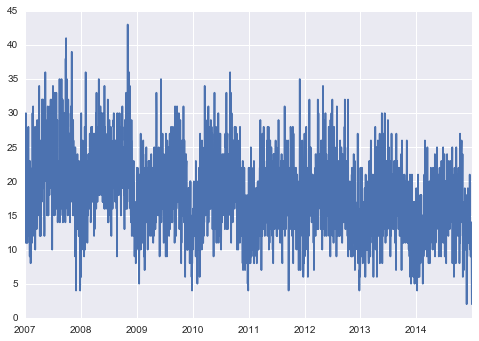

In [383]:
data.date.value_counts().sort_index().plot()
plt.show()

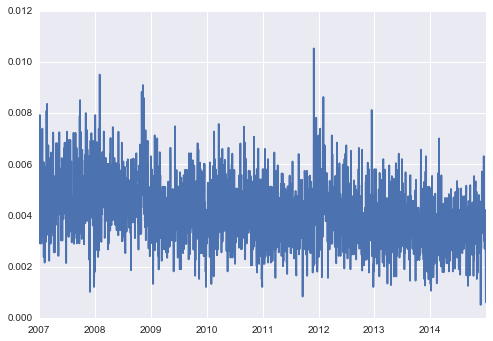

In [440]:
merged.norm.plot()
plt.show()

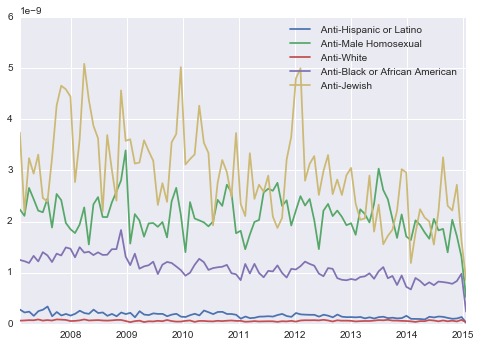

In [529]:
for x in by_type:
    (by_type[x].norm.resample('30D',label='right').sum()/population[x]).plot(label=bias_dict[x])
plt.legend()
plt.show()

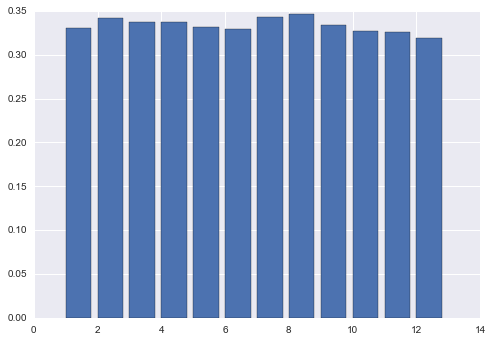

In [446]:
tmp=anti_b_merged.groupby('month').sum()['norm']
plt.bar(tmp.index,tmp.values)
plt.show()

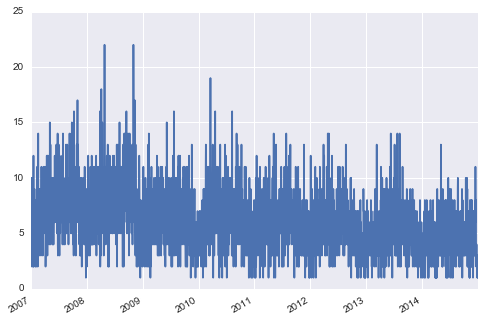

In [442]:
anti_b_by_date=anti_b.date.value_counts().sort_index()
anti_b_by_date.plot()
plt.show()

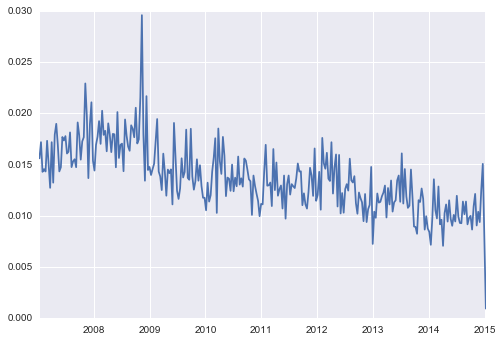

In [450]:
anti_b_merged['norm'].resample('10D',label='right').sum().plot()
plt.show()

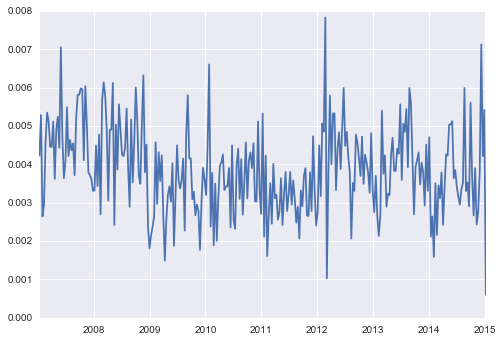

In [451]:
anti_w_merged['norm'].resample('10D',label='right').sum().plot()
plt.show()

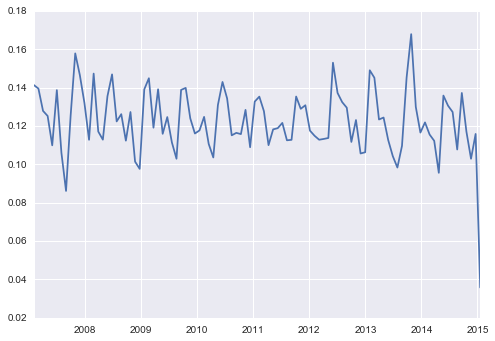

In [313]:
merged['norm'].resample('30D',label='right').sum().plot()
plt.show()

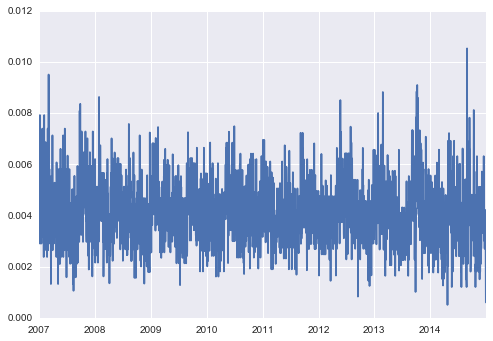

In [334]:
merged['norm'].plot()
plt.show()

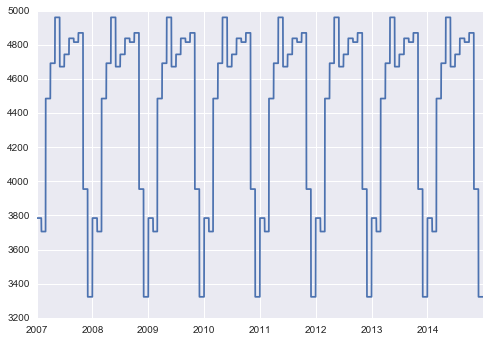

In [445]:
plt.plot(merged.index,merged['avg_month'])
plt.show()